<a href="https://colab.research.google.com/github/YuehMintTai/000/blob/main/20211017Rpython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rpy2

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
install.packages('pROC')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘plyr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

In [5]:
%%R
myData<-read.csv('dep_result_df')
tail(myData,1)

        X real   predict 軍人 sex   age
4471 4470    1 0.3512212    0   2 29.25


R[write to console]: Type 'citation("pROC")' for a citation.

R[write to console]: 
Attaching package: ‘pROC’


R[write to console]: The following objects are masked from ‘package:stats’:

    cov, smooth, var


R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases



  |======================================================================| 100%


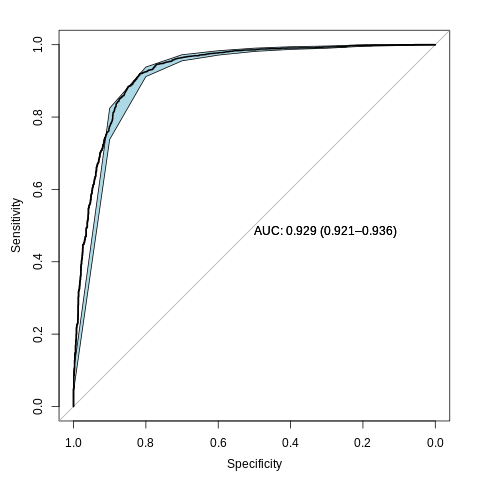

In [6]:
%%R
library(pROC)
pROC_obj<-roc(myData$real,myData$predict,smoothed=TRUE, print.auc=TRUE, ci=TRUE, ci.alpha=0.9, plot=TRUE)
myROC.ci<-ci.se(pROC_obj)
plot(myROC.ci, type='shape',col='lightblue')

In [ ]:
%%R
install.packages('InformationValue')

In [18]:
%%R
library(InformationValue)
optimal<-optimalCutoff(myData$real,myData$predict)[1]
confusionMatrix(myData$real,myData$predict)
confusionMatrix(myData$real,myData$predict,threshold=optimal)
optimal ##0.1687012
sensitivity(myData$real,myData$predict) #0.7041864
specificity(myData$real,myData$predict) #0.9247035
sensitivity(myData$real,myData$predict,threshold=optimal) ##0.9206161
specificity(myData$real,myData$predict,threshold=optimal) ##0.8127901


[1] 0.8127901
